In [1]:
# Install packages
# pip install cvxopt

# Settings
%load_ext autoreload
%autoreload 2

# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from pathlib import Path  

# Local package
import pypfopt_FEseminar
from pypfopt_FEseminar import risk_models
from pypfopt_FEseminar import plotting
from pypfopt_FEseminar import EfficientFrontier
from pypfopt_FEseminar import DiscreteAllocation 
from pypfopt_FEseminar import base_optimizer
from pypfopt_FEseminar import expected_returns
import FEseminar

# Parent folder containing stock price observations and other input data, returns will be saved here.
pf = 'C:/Users/Carla/Dropbox/Uni/10. Semester/Seminar Fin Econ/Data'  

# Full simulation: Solving the portfolio choice problem with varying end years, budgets, risk methods, etc
Current simplifying assumptions, rf = 0, inflation = HICP, constant exchange rate within country (EUR/DKK Same in 2001 as in 2021)


In [7]:
# Simulation settings
nstocks = 50 # Number of stocks 
threshold = 1
WB = (0, 1) # Weight bounds, use (-1, 1) if shorts are allowed
SR = 0 # Short ratio
rf = 0. #risk_free_rate, The period of the risk-free rate should correspond to the frequency of expected returns.
inflation = 2.019866747 # in %, HICP inflation for European union per year from 2001-2021, https://ec.europa.eu/eurostat/databrowser/view/PRC_HICP_MIDX__custom_2665246/default/table?lang=en

# Countrycodes + exchrates
countries = pd.read_csv (f'{pf}/countrycodes.csv')

### --- ####
ncountries = 32 # Number of countries, max = 32
#select_countries = ('DNK', 'DEU', 'FRA', 'GBR', 'IND', 'JPN')
#countries = countries[countries['ISO Country Code'].isin(select_countries)] 
### --- ####

countrycds = countries['ISO Country Code'][:ncountries]
exchrates = countries['Rate'][:ncountries]

# Estimation windows
start_dates = ['2001-01-02','2002-01-02','2003-01-02','2004-01-02','2005-01-02','2006-01-02','2007-01-02','2008-01-02','2009-01-02','2010-01-02','2011-01-02','2012-01-02', '2013-01-02', '2014-01-02', '2015-01-02', '2016-01-02', '2017-01-02',
        '2018-01-02', '2019-01-02', '2020-01-02', '2021-01-02']
end_dates = ['2001-12-31','2002-12-31','2003-12-31','2004-12-31','2005-12-31','2006-12-31','2007-12-31','2008-12-31','2009-12-31','2010-12-31','2011-12-31','2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
        '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31']

# Budgets to loop over
budget_array = np.array([100, 250, 500, 1000, 2000, 3000, 5000, 10000, 25000, 50000, 250000, 500000, 1000000, 10000000, 100000000])

budget_array_str = ['100', '250', '500', '1k', '2k', '3k', '5k', '10k', '25k', '50k', '250k', '500k', '1m', '10m', '100m'] # for plotting


###
risk_methods = ["sample_cov", "ledoit_wolf_single_factor","oracle_approximating", "ledoit_wolf_constant_variance", "exp_cov"]


In [6]:
break
# Run full sim
for method in risk_methods: 
# run full simulation
    sim = FEseminar.full_sim(nstocks, ncountries, method, countrycds, exchrates, pf, start_dates, end_dates, budget_array,
                      WB, SR, rf, inflation)

SyntaxError: 'break' outside loop (<ipython-input-6-99abf4e7f8d8>, line 1)

# Plots and tables

## Impact of budget on portfolio risk plot

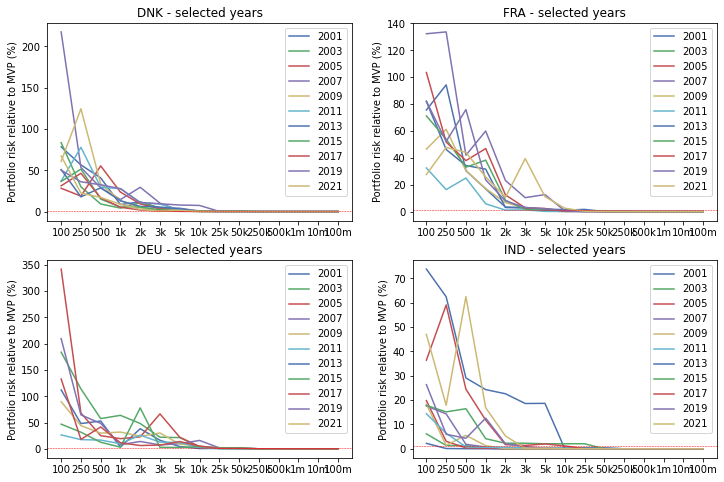

In [5]:
#
method ='sample_cov' #'ledoit_wolf_single_factor'#'oracle_approximating'#'sample_cov' # 'ledoit_wolf_constant_variance'
nstocks = 50 # Number of stocks 

# Only for select countries
ncountries = 6 # Number of countries, max = 33
countries = pd.read_csv (f'{pf}/countrycodes.csv')
select_countries = ('DNK', 'DEU', 'FRA', 'GBR', 'JPN', 'IND') ### Must equal NSTOCKS
countries = countries[countries['ISO Country Code'].isin(select_countries)]

# Loop pars ( 6 countries)
rows = 0, 0, 1, 1 #, 2, 2
cols = 0, 1, 0, 1 #, 0, 1
countrycds = countries['ISO Country Code'][:ncountries] # alternatively select countries to plot here
plot_pars = zip(rows,cols, countrycds)

# x and y ticks + labels
#yticks = np.arange(0,len(budget_array_str),1)
xticks = np.arange(0,len(budget_array_str),1)
budget_array_str2 = ['100', '250', '500', '1k', '2k', '3k', '5k', '10k', '25k', '50k', '250k', '500k', '1m', '10m', '100m'] # for plotting
end_dates_str = end_dates.copy()
end_dates_str= [str.replace('-12-31', '') for str in end_dates_str]

# Initialise the subplot function using number of rows and columns
#figure, axis = plt.subplots(3, 2, figsize=(12,12))
figure, axis = plt.subplots(2, 2, figsize=(12,8))

# Plot each axis
for i, par in enumerate(plot_pars): 
    year_ = end_dates[-1]
    year = end_dates_str[-1] # starts at 0
    
    # set y values
    countrycd = par[2] # Set country
    df = pd.read_csv (f'{pf}/{method}/RDA_RESULTS_{countrycd}_TOP_{nstocks}.csv')
    y = df[['2001-12-31','2003-12-31','2005-12-31','2007-12-31','2009-12-31','2011-12-31','2013-12-31', '2015-12-31', '2017-12-31', '2019-12-31', '2021-12-31']] # select years
    
    # plot
    axis[par[0], par[1]].plot(xticks, y)
    axis[par[0], par[1]].set_title(f'{countrycd} - selected years')
    axis[par[0], par[1]].legend(['2001','2003','2005','2007','2009','2011', '2013', '2015', '2017', '2019', '2021'], loc='upper right')
    
    axis[par[0], par[1]].set_ylabel('Portfolio risk relative to MVP (%)')
    #axis[par[0], par[1]].set_ylim(0, 15)  
    #axis[par[0], par[1]].set_yticks(yticks)
    #axis[par[0], par[1]].set_yticklabels(budget_array_str2)
    
    axis[par[0], par[1]].set_xticks(xticks)
    axis[par[0], par[1]].set_xticklabels(budget_array_str2)
    
    # Add min and max
    axis[par[0], par[1]].axhline(y=1, color='r', linestyle='--',  linewidth=0.5)
    #axis[par[0], par[1]].axhline(y=max(y), color='r', linestyle='--',  linewidth=0.5)
    
    
filepath = Path(f'{pf}/Figures/{method}_TOP_{nstocks}_plt_res1') # Set name
plt.savefig(filepath, bbox_inches='tight')


## Minimum required budget plot

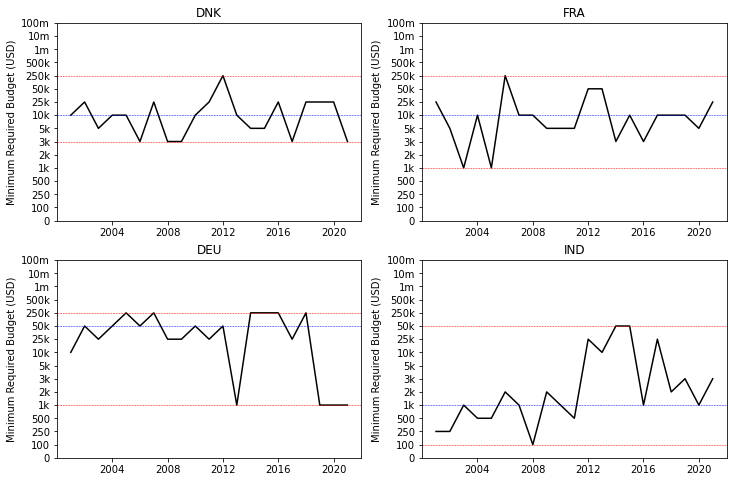

In [6]:
#
method ='sample_cov' #'ledoit_wolf_single_factor'#'oracle_approximating'#'sample_cov' # 'ledoit_wolf_constant_variance'
nstocks = 50 # Number of stocks 

# Only for select countries
ncountries = 6 # Number of countries, max = 33
countries = pd.read_csv (f'{pf}/countrycodes.csv')
select_countries = ('DNK', 'DEU', 'FRA', 'GBR', 'JPN', 'IND') ### Must equal NSTOCKS
countries = countries[countries['ISO Country Code'].isin(select_countries)]

# Loop pars ( 6 countries)
rows = 0, 0, 1, 1#, 2, 2
cols = 0, 1, 0, 1#, 0, 1
countrycds = countries['ISO Country Code'][:ncountries] # alternatively select countries to plot here
plot_pars = zip(rows,cols, countrycds)
start_dates_dateformat = pd.to_datetime(start_dates)
end_dates_dateformat = pd.to_datetime(end_dates)

# x and y ticks + labels
yticks = np.arange(-1,len(budget_array_str),1)
#xticks = np.arange(0,len(start_dates),1)
budget_array_str2 = ['0','100', '250', '500', '1k', '2k', '3k', '5k', '10k', '25k', '50k', '250k', '500k', '1m', '10m', '100m'] # for plotting
start_dates_str = start_dates.copy()
start_dates_str= [str.replace('-12-31', '') for str in start_dates_str]

# Initialise the subplot function using number of rows and columns
#figure, axis = plt.subplots(3, 2, figsize=(12,12))
figure, axis = plt.subplots(2, 2, figsize=(12,8))
# Plot each axis
for i, par in enumerate(plot_pars): 
    
    # set y values
    countrycd = par[2] # Set country
    df = pd.read_csv (f'{pf}/{method}/RDA_RESULTS_{countrycd}_TOP_{nstocks}.csv')
    y = FEseminar.mrb_index(df, threshold, countrycd)
    
    # plot
    axis[par[0], par[1]].plot(start_dates_dateformat, y, color='black')
    axis[par[0], par[1]].set_title(f'{countrycd}')
    
    axis[par[0], par[1]].set_ylabel('Minimum Required Budget (USD)')
    axis[par[0], par[1]].set_yticks(yticks)
    axis[par[0], par[1]].set_yticklabels(budget_array_str2)
    
    #axis[par[0], par[1]].set_xticks(xticks)
    #axis[par[0], par[1]].set_xticklabels(start_dates_str)
    
    # Add min and max
    axis[par[0], par[1]].axhline(y=min(y), color='r', linestyle='--',  linewidth=0.5)
    axis[par[0], par[1]].axhline(y=statistics.median(y), color='b', linestyle='--',  linewidth=0.5) # median
    axis[par[0], par[1]].axhline(y=max(y), color='r', linestyle='--',  linewidth=0.5)
    
filepath = Path(f'{pf}/Figures/{method}_TOP_{nstocks}_plt_res2') # Set name
plt.savefig(filepath, bbox_inches='tight')


## Minimum required N assets plot

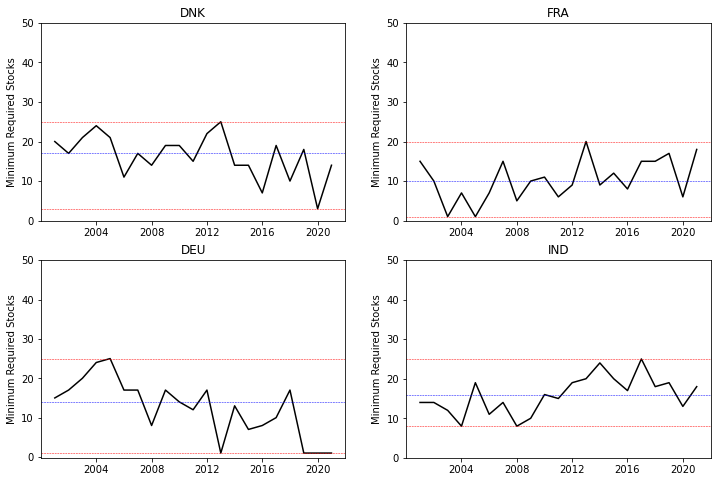

In [7]:
# plot: 6 countries max
rows = 0, 0, 1, 1#, 2, 2
cols = 0, 1, 0, 1#, 0, 1
countrycds = countries['ISO Country Code'][:ncountries] # alternatively select countries to plot here
plot_pars = zip(rows,cols, countrycds)

# x and y ticks + labels
yticks = np.arange(0, 60,10)
xticks = np.arange(0,len(start_dates),1)
budget_array_str2 = ['0','100', '250', '500', '1k', '2k', '3k', '5k', '10k', '25k', '50k', '250k', '500k', '1m', '10m', '100m'] # for plotting
start_dates_str = start_dates.copy()
start_dates_str= [str.replace('-12-31', '') for str in start_dates_str]

# Initialise the subplot function using number of rows and columns
#figure, axis = plt.subplots(3, 2, figsize=(12,12))
figure, axis = plt.subplots(2, 2, figsize=(12,8))

# Plot each axis
for i, par in enumerate(plot_pars): 
    
    # set y values
    countrycd = par[2] # Set country
    df = pd.read_csv (f'{pf}/{method}/RDA_RESULTS_{countrycd}_TOP_{nstocks}.csv')
    y_mrb = FEseminar.mrb_index(df, threshold, countrycd)
    
    # Select corresponding N assets
    df = pd.read_csv (f'{pf}/{method}/NAA_RESULTS_{countrycd}_TOP_{nstocks}.csv')
    y = []
    for col, index in enumerate(y_mrb):
        n = df.iloc[index, col]
        y.append(n)
    
    # plot
    axis[par[0], par[1]].plot(start_dates_dateformat, y, color='black')
    axis[par[0], par[1]].set_title(f'{countrycd}')
    
    axis[par[0], par[1]].set_ylabel('Minimum Required Stocks')
    axis[par[0], par[1]].set_yticks(yticks)
    #axis[par[0], par[1]].set_yticklabels(budget_array_str2)
    
    #axis[par[0], par[1]].set_xticks(xticks)
    #axis[par[0], par[1]].set_xticklabels(start_dates_str)
    
    # Add min and max
    axis[par[0], par[1]].axhline(y=min(y), color='r', linestyle='--',  linewidth=0.5) # min
    axis[par[0], par[1]].axhline(y=statistics.median(y), color='b', linestyle='--',  linewidth=0.5) # median
    axis[par[0], par[1]].axhline(y=max(y), color='r', linestyle='--',  linewidth=0.5) # max
    
filepath = Path(f'{pf}/Figures/{method}_TOP_{nstocks}_plt_res3') # Set name
plt.savefig(filepath, bbox_inches='tight')


## Table: Estimation results for all countries, across the entire period 2001-2021

In [8]:
countries = pd.read_csv (f'{pf}/countrycodes.csv')
ncountries=32
countrycds = countries['ISO Country Code'][:ncountries]
risk_methods = ['sample_cov', 'oracle_approximating', 'ledoit_wolf_single_factor', 'ledoit_wolf_constant_variance'] #'exp_cov', 

# generate results 
#for nstocks in (50,25,10)
for m in risk_methods:
    method = m
    for i, par in enumerate(countrycds): 
        # set y values
        countrycd = par # Set country
        df = pd.read_csv (f'{pf}/{method}/RDA_RESULTS_{countrycd}_TOP_{nstocks}.csv')
        y_mrb = FEseminar.mrb_index(df, threshold, countrycd)

        # Select corresponding N assets
        df = pd.read_csv (f'{pf}/{method}/NAA_RESULTS_{countrycd}_TOP_{nstocks}.csv')
        y = []
        for col, index in enumerate(y_mrb):
            n = df.iloc[index, col]
            y.append(int(n))

        # DF with MRA & MR by year
        df = pd.DataFrame(list(zip(y_mrb, y, end_dates_dateformat)),
                   columns =['MRB', 'MRA', 'YEAR'], index=end_dates_dateformat)


        filepath = Path(f'{pf}/{method}/Table/RESULTS_{countrycd}_TOP_{nstocks}.csv') # Set name
        filepath.parent.mkdir(parents=True, exist_ok=True)  
        df.to_csv(filepath, index=True)

In [9]:
# Read from summary table and print to latex
method ='sample_cov' #'ledoit_wolf_single_factor'#'oracle_approximating'#'sample_cov'
df_sum = pd.read_excel(f'{pf}/Summaries/summary_table_{method}_TOP_{nstocks}.xlsx', sheet_name='main')
# To latex
print(df_sum.to_latex(index=False, float_format="%.3f"))


\begin{tabular}{llllrrr}
\toprule
     COUNTRYCD &                                                MIN & MEDIAN &   MAX &  MIN.1 &  MEDIAN.1 &  MAX.1 \\
\midrule
           AUS &  =INDEX(Table!\$P\$1:\$R\$14;MATCH(Table!I2;Table!\$... &    10k &  250k &      1 &        18 &     31 \\
           AUT &                                                 1k &    25k &  250k &      1 &        18 &     29 \\
           BEL &                                                 3k &    25k &  250k &      8 &        17 &     28 \\
           CHE &                                                100 &     2k &    5k &      2 &         6 &     10 \\
           CHN &                                                100 &    100 &    3k &      1 &         7 &     21 \\
           DEU &                                                 1k &    50k &  250k &      1 &        14 &     25 \\
           DNK &                                                 3k &    10k &  250k &      3 &        17 &     25 \\
        

# Additional plots

## Estimation results across all countries

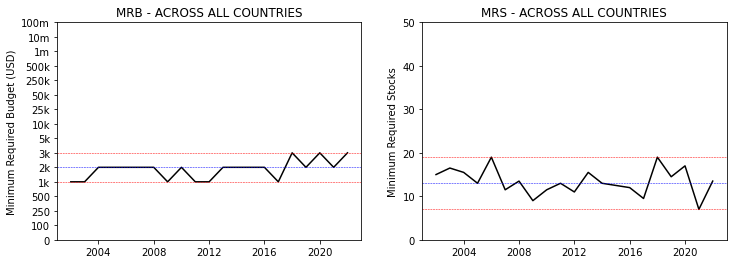

In [10]:
method ='sample_cov' #'ledoit_wolf_single_factor'#'oracle_approximating'#'sample_cov'# 'ledoit_wolf_constant_variance'

df = pd.read_excel(f'{pf}/Summaries/summary_table_{method}_TOP_{nstocks}.xlsx', sheet_name='main_2')

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(12,4))

# plot
yticks_MRB = np.arange(-1,len(budget_array_str),1)
axis[0].plot(df['YEAR'], df['MRB'], color='black')
axis[0].set_title(f'MRB - ACROSS ALL COUNTRIES')
axis[0].set_ylabel('Minimum Required Budget (USD)')
axis[0].set_yticks(yticks_MRB)
axis[0].set_yticklabels(budget_array_str2)
axis[0].axhline(y=min(df['MRB']), color='r', linestyle='--',  linewidth=0.5) # min
axis[0].axhline(y=statistics.median(df['MRB']), color='b', linestyle='--',  linewidth=0.5) # median
axis[0].axhline(y=max(df['MRB']), color='r', linestyle='--',  linewidth=0.5) # max

# Plot each axis
yticks_MRA = np.arange(0, 60,10)
axis[1].plot(df['YEAR'], df['MRA'], color='black')
axis[1].set_title(f'MRS - ACROSS ALL COUNTRIES')
axis[1].set_ylabel('Minimum Required Stocks')
axis[1].set_yticks(yticks_MRA)
# Add min and max
axis[1].axhline(y=min(df['MRA']), color='r', linestyle='--',  linewidth=0.5) # min
axis[1].axhline(y=statistics.median(df['MRA']), color='b', linestyle='--',  linewidth=0.5) # median
axis[1].axhline(y=max(df['MRA']), color='r', linestyle='--',  linewidth=0.5) # max

filepath = Path(f'{pf}/Figures/{method}_TOP_{nstocks}_plt_res4') # Set name
plt.savefig(filepath, bbox_inches='tight')

# Discussion

## Changing the covariance matrix estimator

In [11]:
# Comparison of overall results across all countries with the 3 different COVAR-ESTIMATORS

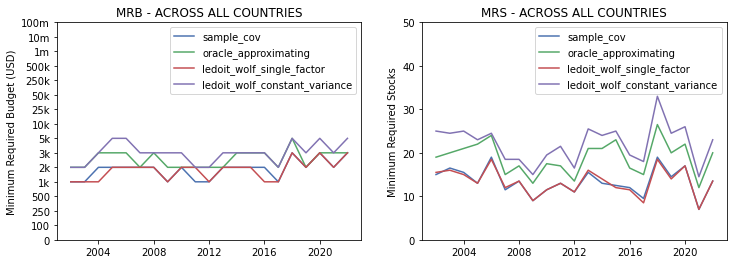

In [12]:
#method ='semicovariance' #'ledoit_wolf_single_factor'#'oracle_approximating'#'sample_cov'#'semicovariance'
nstocks = 50

df = pd.read_excel(f'{pf}/Summaries/summary_table_{method}_TOP_{nstocks}.xlsx', sheet_name='main_2')

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(12,4))

for i, m in enumerate(risk_methods): 
    method = m
    
    # set y values
    df = pd.read_excel(f'{pf}/Summaries/summary_table_{method}_TOP_{nstocks}.xlsx', sheet_name='main_2')

    # plot each axis
    yticks_MRB = np.arange(-1,len(budget_array_str),1)
    axis[0].plot(df['YEAR'], df['MRB'])#, color='black')
    axis[0].set_title(f'MRB - ACROSS ALL COUNTRIES')
    axis[0].set_ylabel('Minimum Required Budget (USD)')
    axis[0].legend(risk_methods, loc='upper right')
    axis[0].set_yticks(yticks_MRB)
    axis[0].set_yticklabels(budget_array_str2)
    #axis[0].axhline(y=min(df['MRB']), color='r', linestyle='--',  linewidth=0.5) # min
    #axis[0].axhline(y=statistics.median(df['MRB']), color='b', linestyle='--',  linewidth=0.5) # median
    #axis[0].axhline(y=max(df['MRB']), color='r', linestyle='--',  linewidth=0.5) # max

    yticks_MRA = np.arange(0, 60,10)
    axis[1].plot(df['YEAR'], df['MRA'])#, color='black')
    axis[1].set_title(f'MRS - ACROSS ALL COUNTRIES')
    axis[1].legend(risk_methods, loc='upper right')
    axis[1].set_ylabel('Minimum Required Stocks')
    axis[1].set_yticks(yticks_MRA)
    # Add min and max
    #axis[1].axhline(y=min(df['MRA']), color='r', linestyle='--',  linewidth=0.5) # min
    #axis[1].axhline(y=statistics.median(df['MRA']), color='b', linestyle='--',  linewidth=0.5) # median
    #axis[1].axhline(y=max(df['MRA']), color='r', linestyle='--',  linewidth=0.5) # max

#figure.legend(risk_methods, loc='best')

filepath = Path(f'{pf}/Figures/TOP_{nstocks}_plt_res5') # Set name
plt.savefig(filepath, bbox_inches='tight')


## Changing the the available number of assets

In [ ]:
# Comparison of overall results when allowing for N=10, N=25 and N=50 stocks

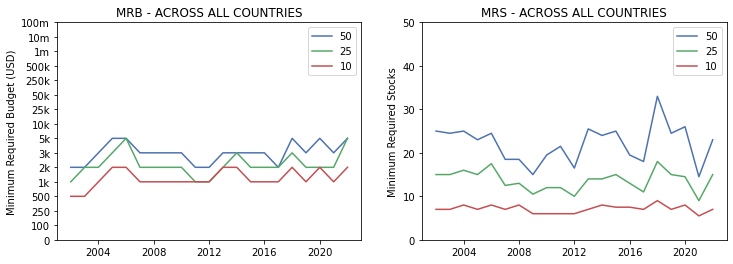

In [13]:
#method ='semicovariance' #'ledoit_wolf_single_factor'#'oracle_approximating'#'sample_cov'#'semicovariance'

df = pd.read_excel(f'{pf}/Summaries/summary_table_{method}_TOP_{nstocks}.xlsx', sheet_name='main_2')

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(12,4))

nstocks_list = (50, 25, 10)

for i, stocks in enumerate(nstocks_list): 
    nstocks = stocks
    
    # set y values
    df = pd.read_excel(f'{pf}/Summaries/summary_table_{method}_TOP_{nstocks}.xlsx', sheet_name='main_2')

    # plot each axis
    yticks_MRB = np.arange(-1,len(budget_array_str),1)
    axis[0].plot(df['YEAR'], df['MRB'])#, color='black')
    axis[0].set_title(f'MRB - ACROSS ALL COUNTRIES')
    axis[0].set_ylabel('Minimum Required Budget (USD)')
    axis[0].legend(nstocks_list, loc='upper right')
    axis[0].set_yticks(yticks_MRB)
    axis[0].set_yticklabels(budget_array_str2)
    #axis[0].axhline(y=min(df['MRB']), color='r', linestyle='--',  linewidth=0.5) # min
    #axis[0].axhline(y=statistics.median(df['MRB']), color='b', linestyle='--',  linewidth=0.5) # median
    #axis[0].axhline(y=max(df['MRB']), color='r', linestyle='--',  linewidth=0.5) # max

    yticks_MRA = np.arange(0, 60,10)
    axis[1].plot(df['YEAR'], df['MRA'])#, color='black')
    axis[1].set_title(f'MRS - ACROSS ALL COUNTRIES')
    axis[1].legend(nstocks_list, loc='upper right')
    axis[1].set_ylabel('Minimum Required Stocks')
    axis[1].set_yticks(yticks_MRA)
    # Add min and max
    #axis[1].axhline(y=min(df['MRA']), color='r', linestyle='--',  linewidth=0.5) # min
    #axis[1].axhline(y=statistics.median(df['MRA']), color='b', linestyle='--',  linewidth=0.5) # median
    #axis[1].axhline(y=max(df['MRA']), color='r', linestyle='--',  linewidth=0.5) # max

#figure.legend(risk_methods, loc='best')

filepath = Path(f'{pf}/Figures/plt_res6') # Set name
plt.savefig(filepath, bbox_inches='tight')
